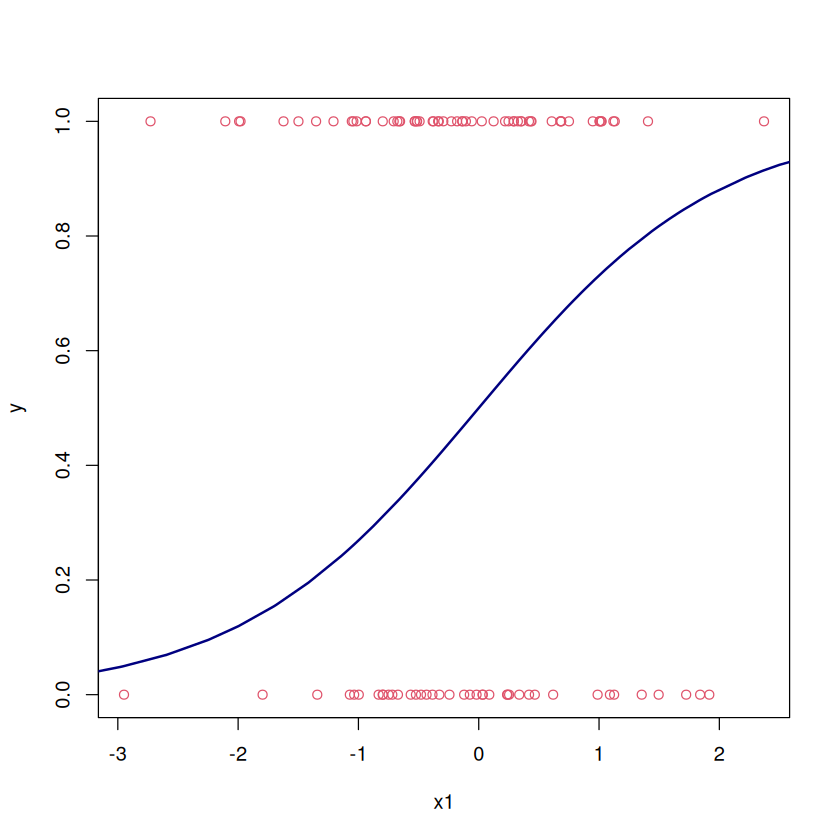

In [25]:
sim_log_data <- function(b1, b2, n, plot = TRUE) {

  x1 <- rnorm(n)
  z <- b1 + b2 * x1
  pz <- 1/(1 + exp(-z))
  y <- rbinom(n, 1, pr)
  if (plot) {
    plot(x1, y, pch = 21, col = 2)
    lines(sort(z), pz[order(z)], col = 'navy', lwd = 2)
  }
}
sim_log_data(1, 2, 100)

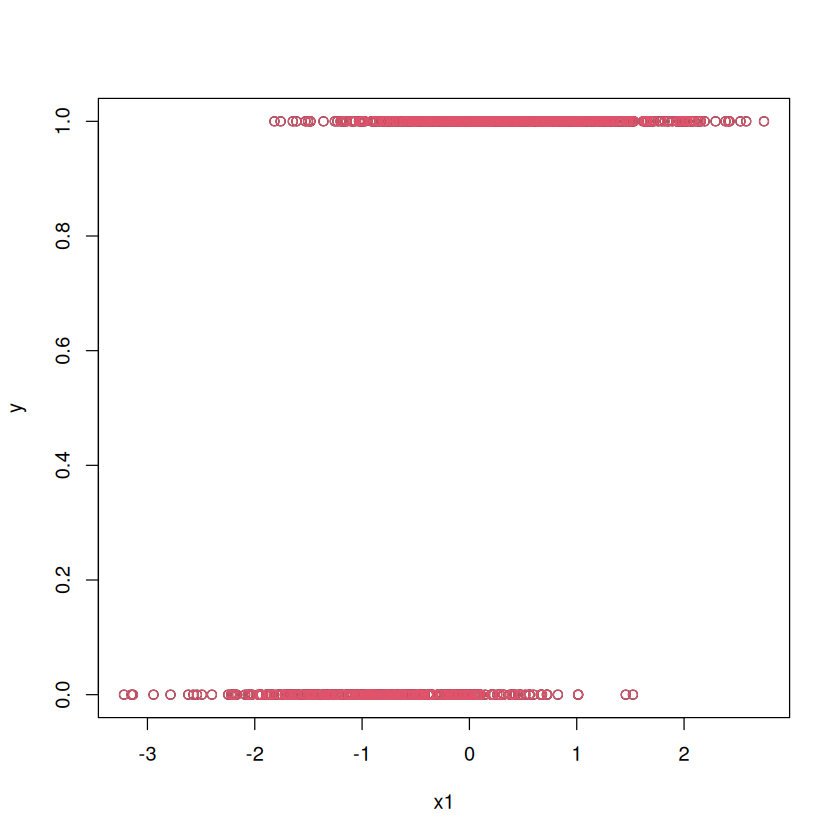

In [17]:
set.seed(666)
x1 <- rnorm(1000)           # some continuous variables 
z  <- 1 + 2*x1
pr <- 1/(1+exp(-z))         # pass through an inv-logit function
pr2 <- plogis(z)
y  <- rbinom(1000,1,pr)      # bernoulli response variable
y2 <- rbinom(1000, 1, pr2)
plot(x1, y)
points(x1, y, col = 2)


Call:
glm(formula = y ~ x1, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8629  -0.6553   0.3143   0.6833   2.3155  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.02949    0.09375   10.98   <2e-16 ***
x1           2.00321    0.13241   15.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1296.13  on 999  degrees of freedom
Residual deviance:  866.58  on 998  degrees of freedom
AIC: 870.58

Number of Fisher Scoring iterations: 5


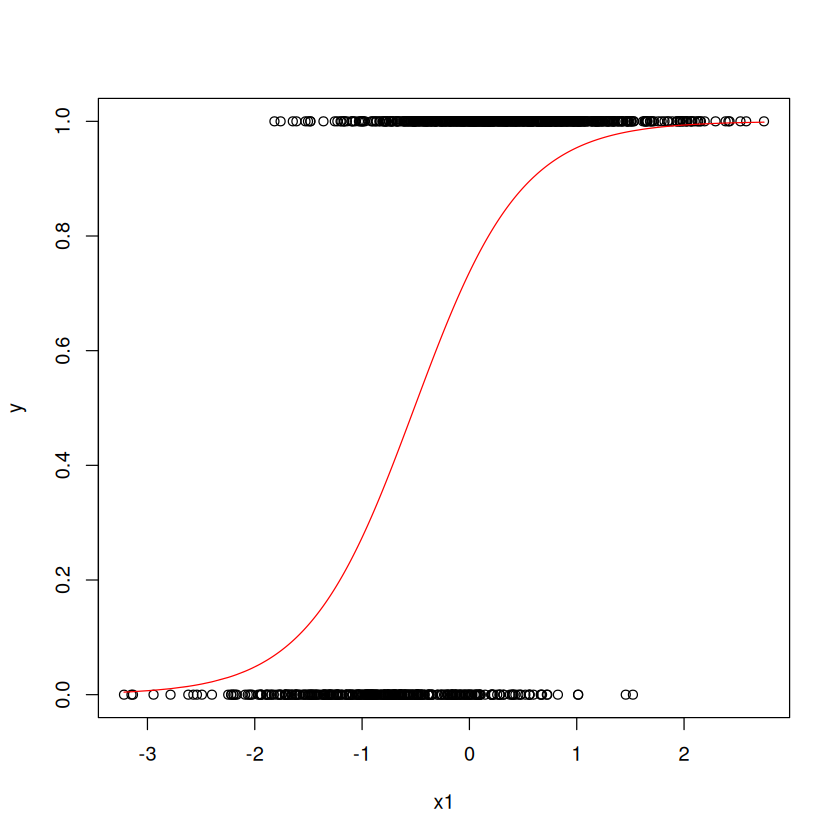

In [14]:
#now feed it to glm:
df <- data.frame(y=y,x1=x1)
log_model <- glm( y~x1,data=df,family="binomial")
fit_vals <- fitted(log_model)
plot(x1, y)
lines(sort(x1), sort(fit_vals), col = 'red')
summary(log_model)